In [ ]:
#pip install -r requirements.txt

In [1]:
import pandas as pd
import seaborn as sns
from seaborn import displot
import matplotlib.pyplot as plt
import missingno as msno
import warnings
import numpy as np
import plotly.express as px
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style('whitegrid')
import base64
import requests as rq
import json
from datetime import date


# Arbol de Decision
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from collections import Counter

# Matriz de Confusion
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Regresion Logistica
from sklearn.linear_model import LogisticRegression

# Random Forest
from sklearn.ensemble import RandomForestClassifier

# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('idealista.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              550 non-null    int64  
 1   propertyCode       550 non-null    int64  
 2   thumbnail          550 non-null    object 
 3   numPhotos          550 non-null    int64  
 4   price              550 non-null    float64
 5   priceInfo          550 non-null    object 
 6   propertyType       550 non-null    object 
 7   operation          550 non-null    object 
 8   size               550 non-null    float64
 9   rooms              550 non-null    int64  
 10  bathrooms          550 non-null    int64  
 11  address            550 non-null    object 
 12  province           550 non-null    object 
 13  municipality       550 non-null    object 
 14  district           532 non-null    object 
 15  country            550 non-null    object 
 16  latitude           550 non

In [3]:
df.head()

,index,propertyCode,thumbnail,numPhotos,price,priceInfo,propertyType,operation,size,rooms,...,has360,hasStaging,topNewDevelopment,topPlus,externalReference,floor,hasLift,exterior,neighborhood,highlight
0,0,102428199,https://img4.idealista.com/blur/WEB_LISTING/0/...,21,2500.0,"{'price': {'amount': 2500.0, 'currencySuffix':...",chalet,rent,260.0,3,...,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN
1,1,102698364,https://img4.idealista.com/blur/WEB_LISTING/0/...,28,1000.0,"{'price': {'amount': 1000.0, 'currencySuffix':...",flat,rent,90.0,3,...,False,False,False,False,124380,2,True,NaN,NaN,NaN
2,2,101723155,https://img4.idealista.com/blur/WEB_LISTING/0/...,16,2200.0,"{'price': {'amount': 2200.0, 'currencySuffix':...",flat,rent,80.0,2,...,False,False,False,False,10904,3,False,True,NaN,NaN
3,3,105730669,https://img4.idealista.com/blur/WEB_LISTING/0/...,24,2500.0,"{'price': {'amount': 2500.0, 'currencySuffix':...",penthouse,rent,140.0,2,...,False,False,False,False,Ático San Francisco,3,True,True,NaN,NaN
4,4,104682179,https://img4.idealista.com/blur/WEB_LISTING/0/...,32,3500.0,"{'price': {'amount': 3500.0, 'currencySuffix':...",flat,rent,130.0,3,...,False,False,False,False,NaN,3,True,True,Vila de Gràcia,NaN


In [4]:
# Crear un diccionario para mapear los nombres actuales a los nombres en español (sin acentos)
column_mapping = {
    'propertyCode': 'CodigoPropiedad',
    'thumbnail': 'MiniaturaURL',
    'numPhotos': 'NumeroFotos',
    'floor': 'Piso',
    'price': 'Precio',
    'priceInfo': 'InformacionPrecio',
    'propertyType': 'TipoPropiedad',
    'operation': 'Operacion',
    'size': 'Tamano',
    'exterior': 'Exterior',
    'rooms': 'Habitaciones',
    'bathrooms': 'Banos',
    'address': 'Direccion',
    'province': 'Provincia',
    'municipality': 'Municipio',
    'district': 'Distrito',
    'country': 'Pais',
    'neighborhood': 'Barrio',
    'latitude': 'Latitud',
    'longitude': 'Longitud',
    'showAddress': 'MostrarDireccion',
    'url': 'URL',
    'distance': 'Distancia',
    'description': 'Descripcion',
    'hasVideo': 'TieneVideo',
    'status': 'Estado',
    'newDevelopment': 'NuevaConstruccion',
    'hasLift': 'TieneAscensor',
    'priceByArea': 'PrecioPorMetroCuadrado',
    'detailedType': 'TipoDetallado',
    'suggestedTexts': 'TextosSugeridos',
    'hasPlan': 'TienePlano',
    'has3DTour': 'TieneTour3D',
    'has360': 'Tiene360',
    'hasStaging': 'TieneHomeStaging',
    'topNewDevelopment': 'DestacadoNuevoDesarrollo',
    'topPlus': 'DestacadoPremium',
    'externalReference': 'ReferenciaExterna',
    'parkingSpace': 'EspacioEstacionamiento',
    'highlight': 'Destacado'
}

# Cambiar los nombres de las columnas en el DataFrame
df.rename(columns=column_mapping, inplace=True)

# Verificar los nuevos nombres de las columnas
print("Columnas en df después del renombramiento:")
print(df.columns)

Columnas en df después del renombramiento:
Index(['index', 'CodigoPropiedad', 'MiniaturaURL', 'NumeroFotos', 'Precio',
       'InformacionPrecio', 'TipoPropiedad', 'Operacion', 'Tamano',
       'Habitaciones', 'Banos', 'Direccion', 'Provincia', 'Municipio',
       'Distrito', 'Pais', 'Latitud', 'Longitud', 'MostrarDireccion', 'URL',
       'Distancia', 'Descripcion', 'TieneVideo', 'Estado', 'NuevaConstruccion',
       'EspacioEstacionamiento', 'PrecioPorMetroCuadrado', 'TipoDetallado',
       'TextosSugeridos', 'TienePlano', 'TieneTour3D', 'Tiene360',
       'TieneHomeStaging', 'DestacadoNuevoDesarrollo', 'DestacadoPremium',
       'ReferenciaExterna', 'Piso', 'TieneAscensor', 'Exterior', 'Barrio',
       'Destacado'],
      dtype='object')


In [5]:
# Observamos datos faltantes
df.isna().sum()

index                         0
CodigoPropiedad               0
MiniaturaURL                  0
NumeroFotos                   0
Precio                        0
InformacionPrecio             0
TipoPropiedad                 0
Operacion                     0
Tamano                        0
Habitaciones                  0
Banos                         0
Direccion                     0
Provincia                     0
Municipio                     0
Distrito                     18
Pais                          0
Latitud                       0
Longitud                      0
MostrarDireccion              0
URL                           0
Distancia                     0
Descripcion                   0
TieneVideo                    0
Estado                        0
NuevaConstruccion             0
EspacioEstacionamiento      390
PrecioPorMetroCuadrado        0
TipoDetallado                 0
TextosSugeridos               0
TienePlano                    0
TieneTour3D                   0
Tiene360

In [6]:
# explorar si hay valores unicos

for i in df.columns:
    if len(df[i].unique())<6:
      print(F'{i}:',len(df[i].unique()),'Values:',df[i].unique())
    else:
      print(F'{i}:',len(df[i].unique()))

index: 50
CodigoPropiedad: 498
MiniaturaURL: 498
NumeroFotos: 69
Precio: 172
InformacionPrecio: 312
TipoPropiedad: 6
Operacion: 1 Values: ['rent']
Tamano: 165
Habitaciones: 9
Banos: 7
Direccion: 361
Provincia: 3 Values: ['Tarragona' 'Barcelona' 'Girona']
Municipio: 48
Distrito: 84
Pais: 1 Values: ['es']
Latitud: 492
Longitud: 492
MostrarDireccion: 2 Values: [False  True]
URL: 498
Distancia: 471
Descripcion: 489
TieneVideo: 2 Values: [False  True]
Estado: 2 Values: ['good' 'renew']
NuevaConstruccion: 1 Values: [False]
EspacioEstacionamiento: 13
PrecioPorMetroCuadrado: 55
TipoDetallado: 10
TextosSugeridos: 408
TienePlano: 2 Values: [False  True]
TieneTour3D: 2 Values: [False  True]
Tiene360: 2 Values: [False  True]
TieneHomeStaging: 1 Values: [False]
DestacadoNuevoDesarrollo: 1 Values: [False]
DestacadoPremium: 1 Values: [False]
ReferenciaExterna: 417
Piso: 19
TieneAscensor: 3 Values: [nan True False]
Exterior: 3 Values: [nan True False]
Barrio: 62
Destacado: 2 Values: [nan "{'groupDescr

In [7]:
df.drop(columns=[
    'MiniaturaURL',  # URL de la imagen en miniatura
    'InformacionPrecio',  # Información adicional sobre el precio
    'Direccion',  # Dirección de la propiedad
    'Latitud',  # Latitud de la propiedad
    'Longitud',  # Longitud de la propiedad
    'Descripcion',  # Descripción textual de la propiedad
    'URL',  # Enlace URL a la página web de la propiedad
    'TipoDetallado',  # Tipo detallado de propiedad
    'TextosSugeridos',  # Textos sugeridos o destacables
    'ReferenciaExterna',  # Referencia externa para la propiedad
    'Destacado',  # Destacado de la propiedad en la plataforma
    'Operacion',  # Tipo de operación
    'Pais',  # País
    'NuevaConstruccion',
    'TieneHomeStaging',  
    'DestacadoNuevoDesarrollo', 
    'DestacadoPremium',  # Destacado Premium
    'EspacioEstacionamiento' 
], inplace=True)

<Axes: >

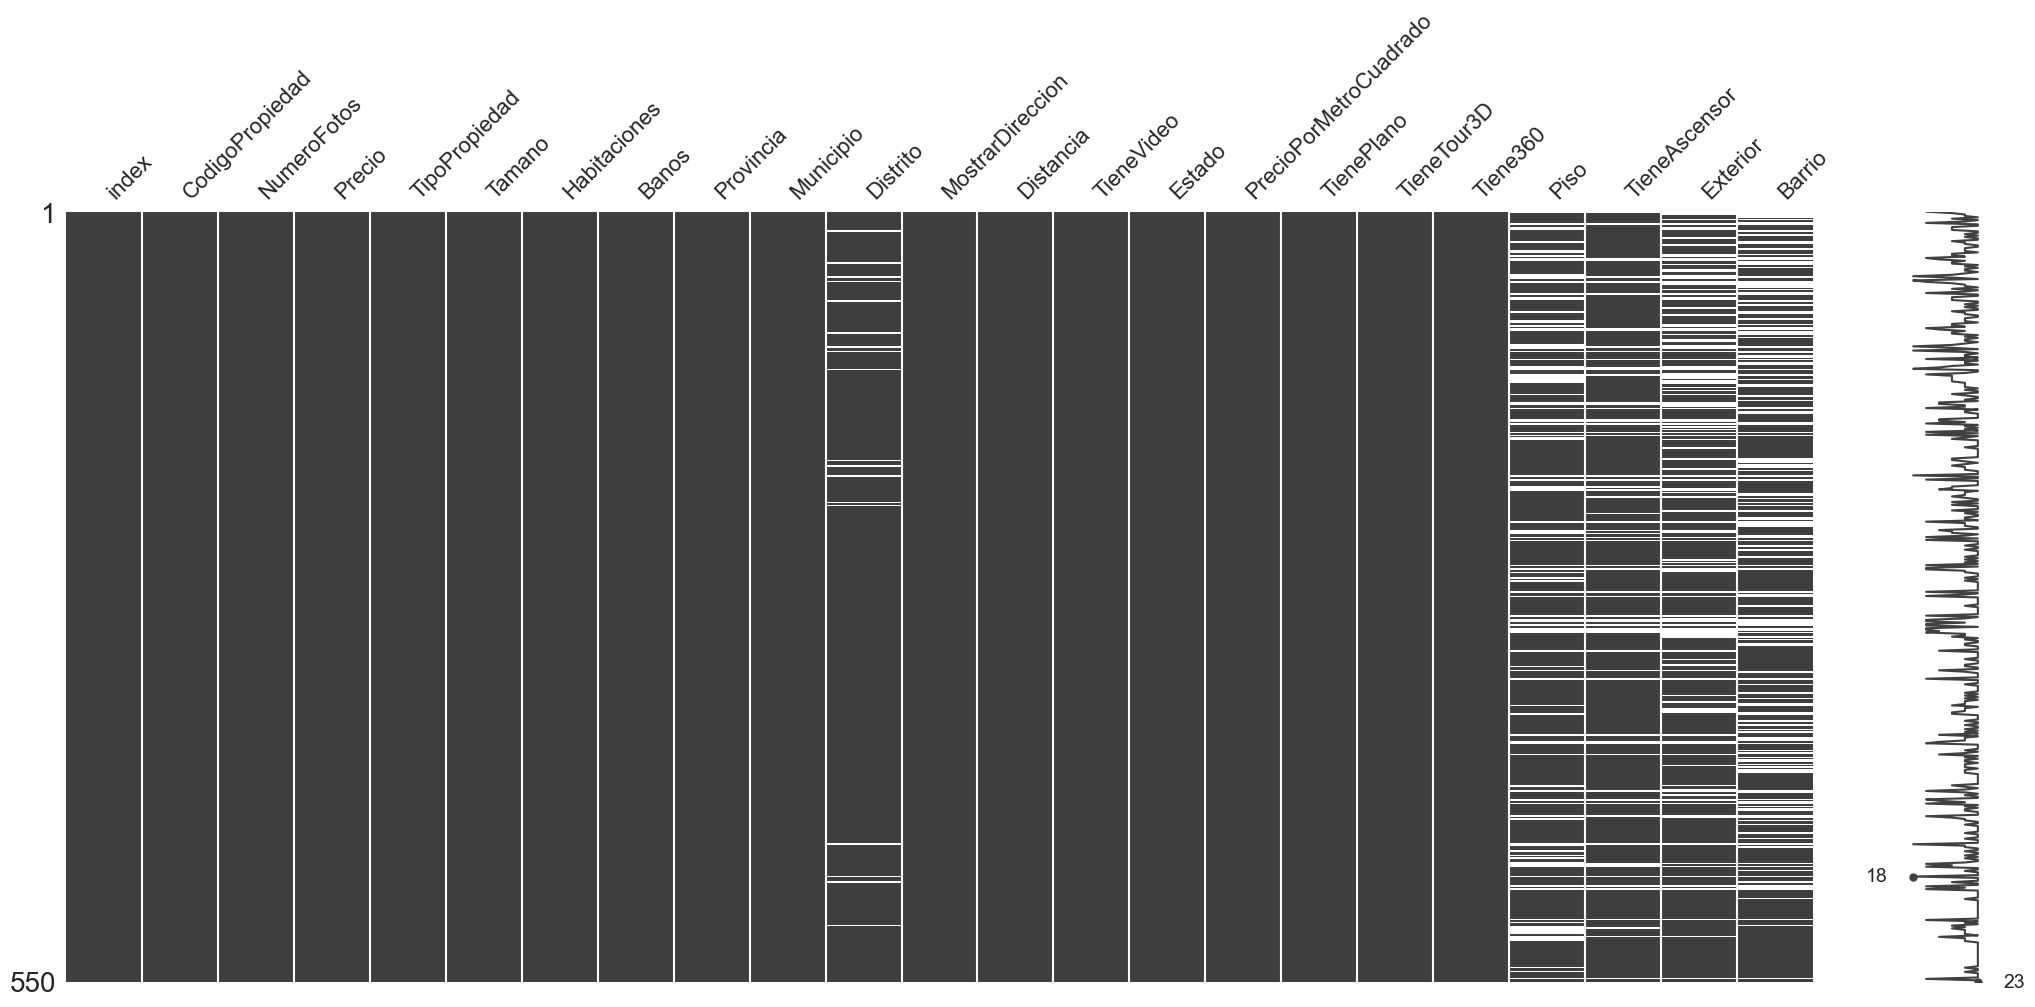

In [8]:
msno.matrix(df)

<Axes: >

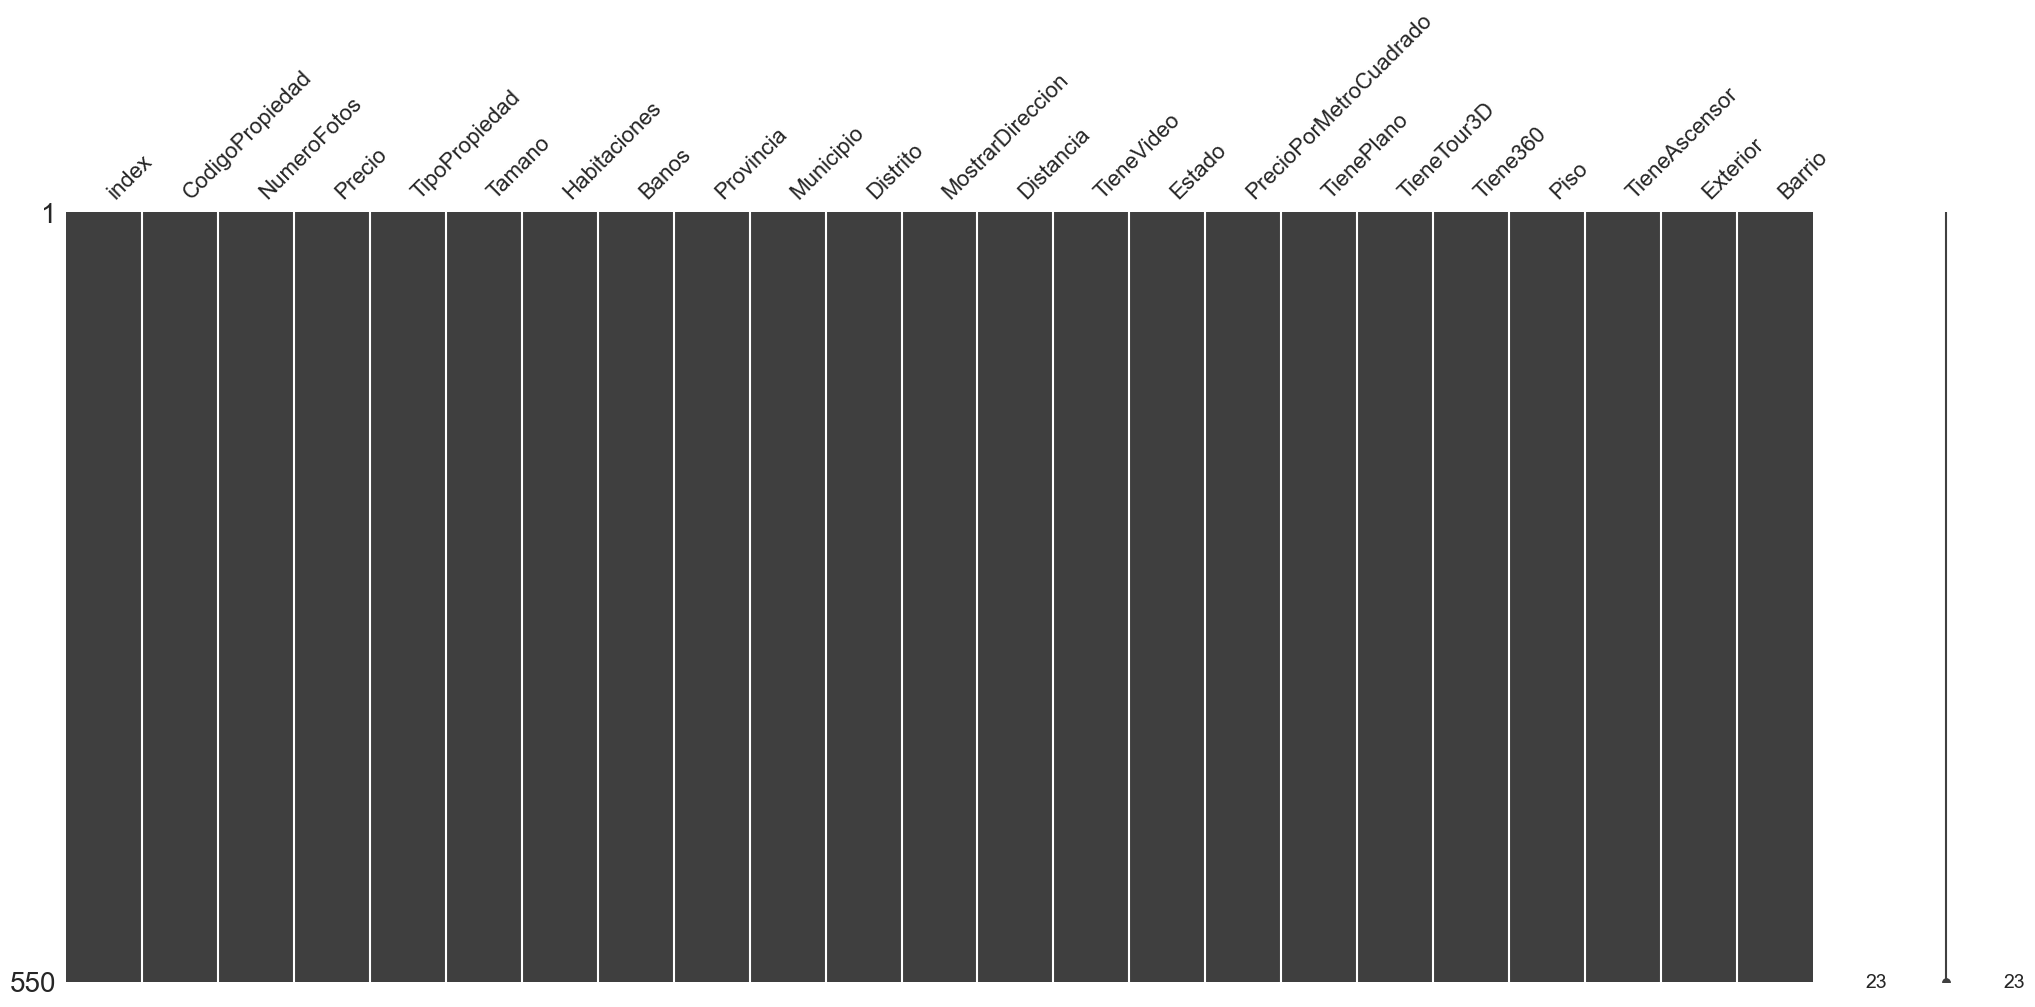

In [10]:
# tratamiendo de valores nulos

# floor
# al observar los datos en el dataset encontramos que los pisos sin datos corresponden a pisos en bajo y le daremos 
# el valor 0, asi tambien reemplazaremos los datos que corresponden a bj como 0

# exterior
# al observar los datos en el dataset encontramos que los datos faltantes corresponden a chalet o casas de campo
# por lo tanto lo cargaremos como TRUE en el dataset

# hasLift
# asumiremos que los pisos que no cuentan con valores en esta variable no cuentan con ascensor

# Rellenar valores nulos en las columnas
df['Piso'].fillna(0, inplace=True)
df['Exterior'].fillna(True, inplace=True)
df['TieneAscensor'].fillna(False, inplace=True)
df['Distrito'].fillna('No especifica', inplace=True)
df['Barrio'].fillna('No especifica', inplace=True)

# Mostrar el DataFrame resultante para verificar los cambios
msno.matrix(df)

In [11]:
# Reemplazar valores específicos en la columna 'Piso'
df['Piso'].replace({'bj': 0, 'en': 0, 'ss': 0, 'st': 0}, inplace=True)

# Convertir la columna 'Piso' a tipo numérico
df['Piso'] = pd.to_numeric(df['Piso'], errors='coerce').fillna(0)

# Rellenar valores nulos en otras columnas
df['Piso'].fillna(0, inplace=True)
df['Exterior'].fillna(True, inplace=True)
df['TieneAscensor'].fillna(False, inplace=True)
df['Distrito'].fillna('No especifica', inplace=True)
df['Barrio'].fillna('No especifica', inplace=True)

In [12]:
# al analizar las variables encontramos que los tipos estan mal especificados
df['Piso'] = df['Piso'].astype(int)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   550 non-null    int64  
 1   CodigoPropiedad         550 non-null    int64  
 2   NumeroFotos             550 non-null    int64  
 3   Precio                  550 non-null    float64
 4   TipoPropiedad           550 non-null    object 
 5   Tamano                  550 non-null    float64
 6   Habitaciones            550 non-null    int64  
 7   Banos                   550 non-null    int64  
 8   Provincia               550 non-null    object 
 9   Municipio               550 non-null    object 
 10  Distrito                550 non-null    object 
 11  MostrarDireccion        550 non-null    bool   
 12  Distancia               550 non-null    int64  
 13  TieneVideo              550 non-null    bool   
 14  Estado                  550 non-null    ob

In [34]:
# Para una mejor practica realizaremos un cambio de las variables objet y bool a numericas
from sklearn.preprocessing import LabelEncoder

# Crear una copia del DataFrame para no modificar el original
df_transformed = df.copy()

# Convertir columnas booleanas a enteros (True -> 1, False -> 0)
bool_columns = df_transformed.select_dtypes(include=['bool']).columns
df_transformed[bool_columns] = df_transformed[bool_columns].astype(int)

# Convertir columnas de tipo object a números enteros usando LabelEncoder
object_columns = df_transformed.select_dtypes(include=['object']).columns

# Inicializar LabelEncoder
label_encoders = {}
for col in object_columns:
    le = LabelEncoder()
    df_transformed[col] = le.fit_transform(df_transformed[col].astype(str))
    label_encoders[col] = le

# Mostrar el DataFrame transformado
print(df_transformed.head())

# Opcional: Guardar el DataFrame transformado a un nuevo archivo CSV
# df_transformed.to_csv('df_transformed.csv', index=False)

   index  CodigoPropiedad  NumeroFotos  Precio  TipoPropiedad  Tamano  \
0      0        102428199           21  2500.0              0   260.0   
1      1        102698364           28  1000.0              3    90.0   
2      2        101723155           16  2200.0              3    80.0   
3      3        105730669           24  2500.0              4   140.0   
4      4        104682179           32  3500.0              3   130.0   

   Habitaciones  Banos  Provincia  Municipio  ...  TieneVideo  Estado  \
0             3      3          2          6  ...           0       0   
1             3      2          0         13  ...           0       0   
2             2      2          0         39  ...           0       0   
3             2      2          0         39  ...           0       0   
4             3      2          0          2  ...           0       0   

   PrecioPorMetroCuadrado  TienePlano  TieneTour3D  Tiene360  Piso  \
0                    10.0           0            0  

In [36]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   550 non-null    int64  
 1   CodigoPropiedad         550 non-null    int64  
 2   NumeroFotos             550 non-null    int64  
 3   Precio                  550 non-null    float64
 4   TipoPropiedad           550 non-null    int32  
 5   Tamano                  550 non-null    float64
 6   Habitaciones            550 non-null    int64  
 7   Banos                   550 non-null    int64  
 8   Provincia               550 non-null    int32  
 9   Municipio               550 non-null    int32  
 10  Distrito                550 non-null    int32  
 11  MostrarDireccion        550 non-null    int32  
 12  Distancia               550 non-null    int64  
 13  TieneVideo              550 non-null    int32  
 14  Estado                  550 non-null    in

In [37]:
#A pesar que ya hemos revisado los nulls, restaría revisar cuántas filas de columnas tenemos completadas con valores que 
#NO sean cero. Esto nos sirve para detectar potenciales errores. Por ejemplo, no tendría sentido 100% de piscina en todos 
#los pisos.

# Calcula el porcentaje de valores distintos de cero en cada columna
porcentaje_no_ceros = df_transformed.apply(lambda col: (col != 0).mean() * 100)

# Muestra el resultado
print(porcentaje_no_ceros)

index                      98.000000
CodigoPropiedad           100.000000
NumeroFotos               100.000000
Precio                    100.000000
TipoPropiedad              89.272727
Tamano                    100.000000
Habitaciones               95.454545
Banos                     100.000000
Provincia                   7.636364
Municipio                  99.636364
Distrito                   99.818182
MostrarDireccion           15.454545
Distancia                 100.000000
TieneVideo                 30.000000
Estado                      0.181818
PrecioPorMetroCuadrado    100.000000
TienePlano                 20.545455
TieneTour3D                 3.272727
Tiene360                    6.545455
Piso                       69.636364
TieneAscensor              64.181818
Exterior                   94.727273
Barrio                     99.818182
dtype: float64


In [38]:
# Haremos el mismo trabajo con cada columna, investigando cual es la media, y cuál es el valor mínimo y máximo.

# Calcula el resumen estadístico
summary_stats = df_transformed.describe()

# Selecciona las métricas deseadas
metrics = ['max', 'min', 'mean', '50%']  # '50%' es la mediana

# Obtiene el resumen estadístico solo para las métricas seleccionadas
summary_metrics = summary_stats.loc[metrics]

# Transpone el resultado para que las métricas estén en las filas y las columnas representen las estadísticas
summary_metrics = summary_metrics.T

# Renombra las columnas para mayor claridad
summary_metrics.columns = ['Valor Máximo', 'Valor Mínimo', 'Promedio', 'Mediana']

# Muestra el resultado
print(summary_metrics)

                        Valor Máximo  Valor Mínimo      Promedio      Mediana
index                           49.0           0.0  2.450000e+01         24.5
CodigoPropiedad          105930756.0    31787437.0  1.014666e+08  105110653.5
NumeroFotos                    118.0           5.0  2.932364e+01         25.5
Precio                       18000.0         550.0  2.713976e+03       2000.0
TipoPropiedad                    5.0           0.0  2.821818e+00          3.0
Tamano                        1848.0          20.0  1.321785e+02         90.0
Habitaciones                    14.0           0.0  2.581818e+00          2.0
Banos                            8.0           1.0  1.858182e+00          2.0
Provincia                        2.0           0.0  1.218182e-01          0.0
Municipio                       47.0           0.0  1.042727e+01          2.0
Distrito                        83.0           0.0  4.117091e+01         27.0
MostrarDireccion                 1.0           0.0  1.545455e-01

In [39]:
df_transformed.sort_values(by='Habitaciones', ascending=False)[['CodigoPropiedad', 'Habitaciones']].head(10)


,CodigoPropiedad,Habitaciones
111,101941792,14
299,103140324,8
144,104600408,6
505,105882065,6
137,105122155,6
148,105245036,6
149,104964909,6
151,105805846,6
49,103577793,6
157,98978083,6


In [40]:
df_transformed.sort_values(by='Banos', ascending=False)[['CodigoPropiedad', 'Banos']].head(10)

,CodigoPropiedad,Banos
148,105245036,8
137,105122155,6
505,105882065,6
34,92959764,6
105,104462053,6
145,104921532,6
547,101690054,6
84,92959764,6
136,105202763,6
111,101941792,6


In [19]:
# A fin de facilitar el trabajo que haremos en el siguiente EDA, catalogaremos 
# las variables en continuas, discretas y separaremos los distritos.


# Definir las características discretas, continuas y distritos en español
features_discretas = [
    'TipoPropiedad', 'Exterior', 'MostrarDireccion', 'TieneVideo', 'Estado',
    'NuevaConstruccion', 'TieneAscensor', 'TienePlano', 'TieneTour3D',
    'Tiene360', 'TieneHomeStaging', 'DestacadoNuevoDesarrollo', 'EspacioEstacionamiento'
]

features_continuas = [
    'NumeroFotos', 'Piso', 'Precio', 'Tamano', 'Habitaciones', 'Banos',
    'Distancia', 'PrecioPorMetroCuadrado'
]

distritos = list(df['Distrito'].unique())  # Asumiendo que 'df' es el nombre de tu DataFrame
label = ['Precio']

In [ ]:
#!pip install graphing

In [ ]:
#!pip install statsmodels

In [20]:
# Descargar el archivo graphing.py
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/graphing.py -O graphing.py

# Importar el módulo graphing
import graphing

# Importar las demás librerías
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import plotly.express as px
import plotly.graph_objects as go

"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [41]:
# Agrupar por distrito y contar el número de localizaciones únicas en cada distrito
localizaciones_por_distrito = df_transformed.groupby('Distrito')['Barrio'].nunique().reset_index()

# Mostrar el resultado
print(localizaciones_por_distrito)

    Distrito  Barrio
0          0       1
1          1       1
2          2       1
3          3       1
4          4       1
..       ...     ...
79        79       1
80        80       2
81        81       1
82        82       1
83        83       1

[84 rows x 2 columns]


In [42]:
# Hacer conteos solo por distrito
distritos_grouped = (df_transformed
    .groupby(["Distrito"], as_index=False)
    .agg(conteo_props=("CodigoPropiedad", "count"))
    ).sort_values("conteo_props", ascending=False)

# Calcular el total de propiedades
total_props = df_transformed.shape[0]

# Calcular el porcentaje total
distritos_grouped['porcentaje_total'] = round(100 * distritos_grouped['conteo_props'] / total_props, 1)

# Mostrar el resultado
print(distritos_grouped)

    Distrito  conteo_props  porcentaje_total
25        25           120              21.8
22        22            94              17.1
77        77            51               9.3
73        73            27               4.9
37        37            27               4.9
..       ...           ...               ...
46        46             1               0.2
47        47             1               0.2
48        48             1               0.2
49        49             1               0.2
83        83             1               0.2

[84 rows x 3 columns]


In [ ]:
#!pip install nbformat


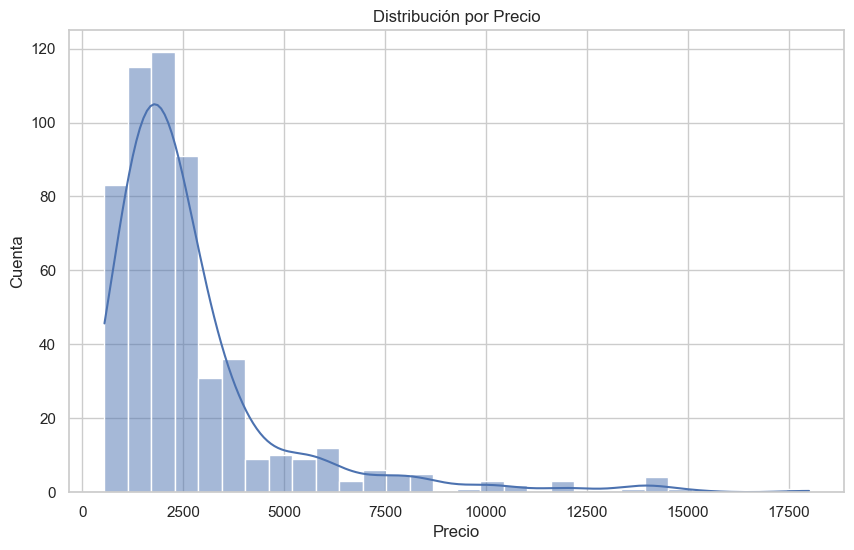

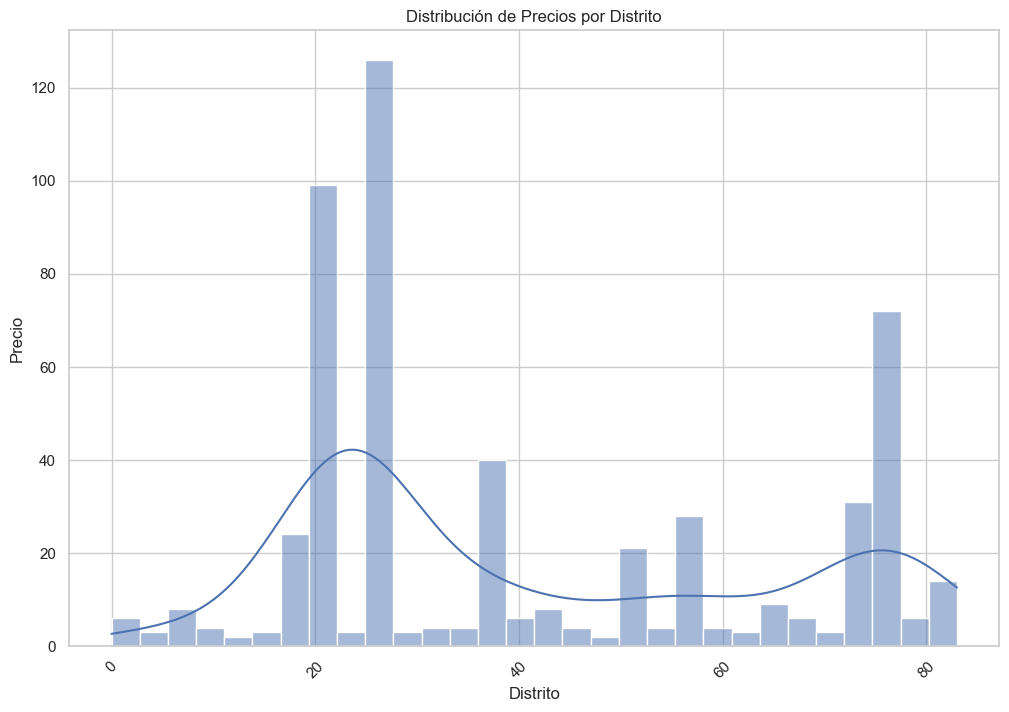

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de estilo
sns.set(style="whitegrid")

# Visualizar la distribución general del precio
plt.figure(figsize=(10, 6))
sns.histplot(df_transformed['Precio'], bins=30, kde=True)
plt.title('Distribución por Precio')
plt.xlabel('Precio')
plt.ylabel('Cuenta')
plt.show()

# Visualizar la distribución del precio por distrito
plt.figure(figsize=(12, 8))
sns.histplot(df_transformed['Distrito'], bins=30, kde=True)
plt.title('Distribución de Precios por Distrito')
plt.xlabel('Distrito')
plt.ylabel('Precio')
plt.xticks(rotation=45)
plt.show()


In [45]:
import pandas as pd

# Supongamos que df es tu DataFrame y ya está cargado con los datos proporcionados

# Calcula Q1 y Q3
Q1 = df['Precio'].quantile(0.25)
Q3 = df['Precio'].quantile(0.75)

# Calcula el IQR
IQR = Q3 - Q1

# Calcula los límites para identificar valores atípicos
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

# Filtra los valores atípicos
outliers = df[(df['Precio'] < lower_fence) | (df['Precio'] > upper_fence)]

# Cuenta la cantidad de valores atípicos
cantidad_outliers = len(outliers)

# Muestra la cantidad de valores atípicos
print(f'Cantidad de valores atípicos: {cantidad_outliers}')

# Opcional: Mostrar los valores atípicos
print(outliers)

Cantidad de valores atípicos: 55
     index  CodigoPropiedad  NumeroFotos   Precio TipoPropiedad  Tamano  \
8        8        105397112           42   8500.0        chalet   250.0   
21      21        105860022           19   5900.0          flat   267.0   
24      24        105794627           19   6000.0          flat   155.0   
33      33        104193915           53   8000.0        chalet   310.0   
34      34         92959764           84  12000.0        chalet   652.0   
44      44         36412002           44   7500.0          flat   247.0   
58       8        105397112           42   8500.0        chalet   250.0   
71      21        105860022           19   5900.0          flat   267.0   
74      24        105794627           19   6000.0          flat   155.0   
83      33        104193915           53   8000.0        chalet   310.0   
84      34         92959764           84  12000.0        chalet   652.0   
94      44         36412002           44   7500.0          flat   2

In [46]:
# A fin de que nos afecten menos los valores atípicos a nuestra distribución, 
# cogeremos como 350 € el tope minimo de valor de las propiedades, 
# quitando aquellas que lo superen. A continuación volveremos a ver cómo queda la distribución.

# Filtra el DataFrame para eliminar las filas donde el precio es mayor a 1,500,000
df_transformed = df_transformed[df_transformed['Precio'] >= 370]

# Muestra la cantidad de filas restantes en el DataFrame
cantidad_filas = len(df)
print(f'Cantidad de filas restantes: {cantidad_filas}')

Cantidad de filas restantes: 550


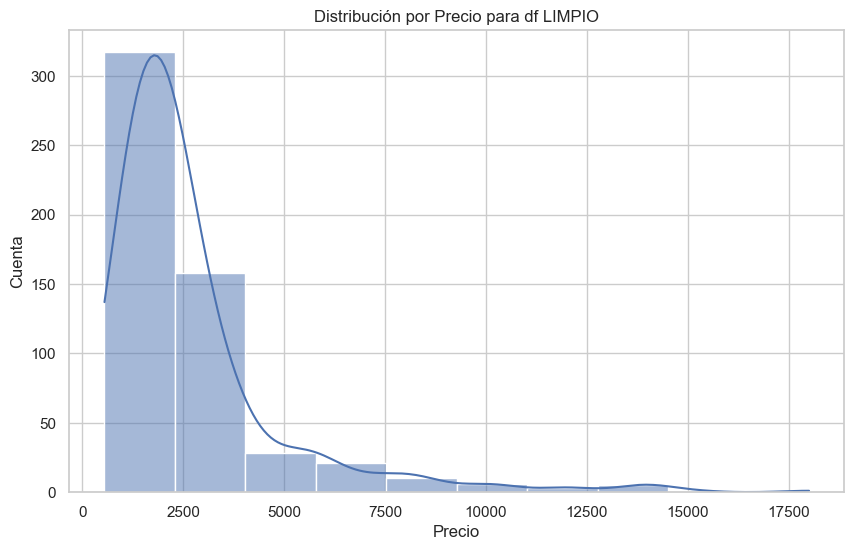

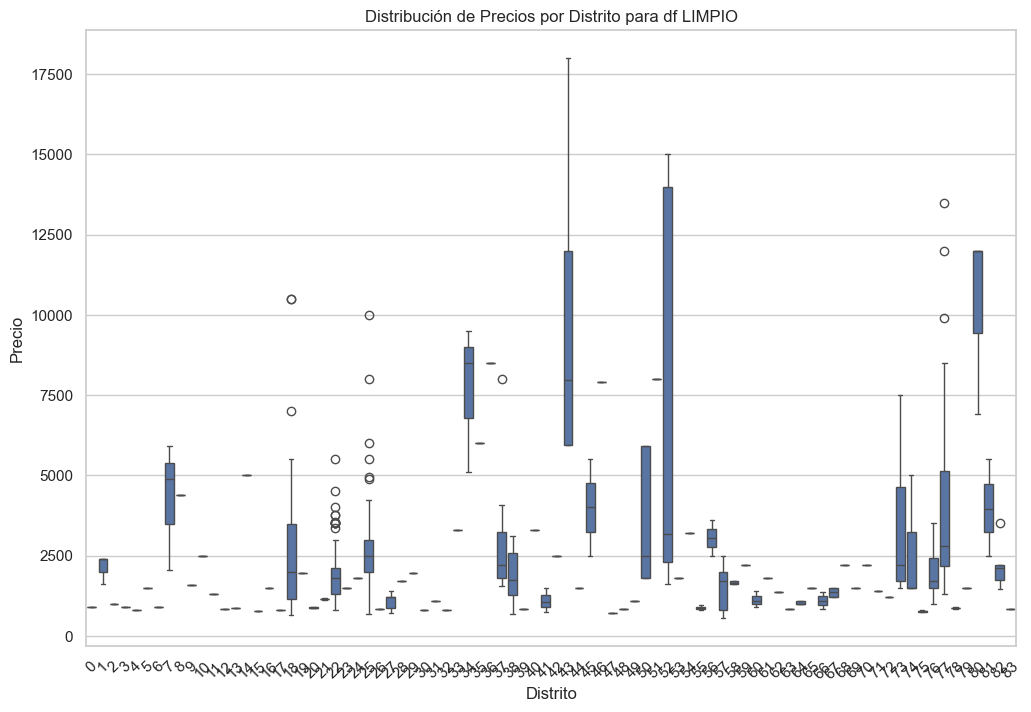

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de estilo
sns.set(style="whitegrid")

# Visualizar la distribución general del precio en el DataFrame limpio
plt.figure(figsize=(10, 6))
sns.histplot(df_transformed['Precio'], bins=10, kde=True)
plt.title('Distribución por Precio para df LIMPIO')
plt.xlabel('Precio')
plt.ylabel('Cuenta')
plt.show()

# Visualizar la distribución del precio por distrito en el DataFrame limpio
plt.figure(figsize=(12, 8))
sns.boxplot(x='Distrito', y='Precio', data=df_transformed)
plt.title('Distribución de Precios por Distrito para df LIMPIO')
plt.xlabel('Distrito')
plt.ylabel('Precio')
plt.xticks(rotation=45)
plt.show()

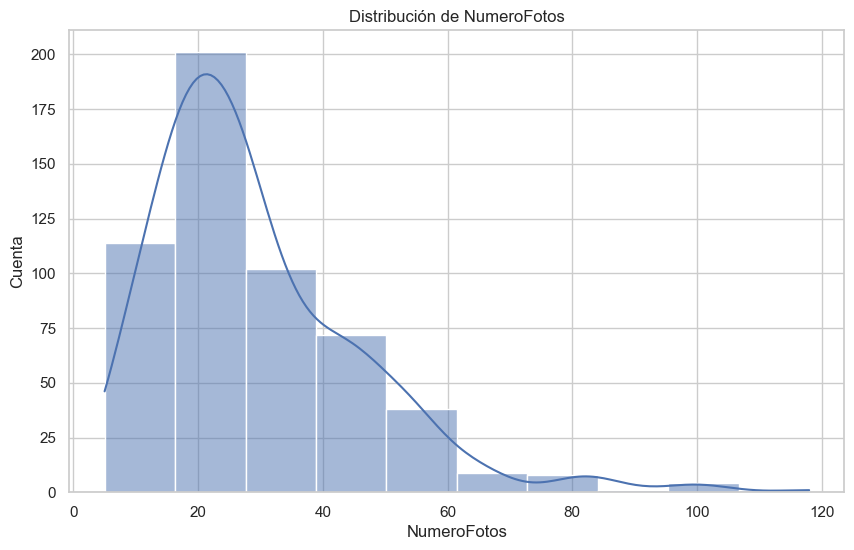

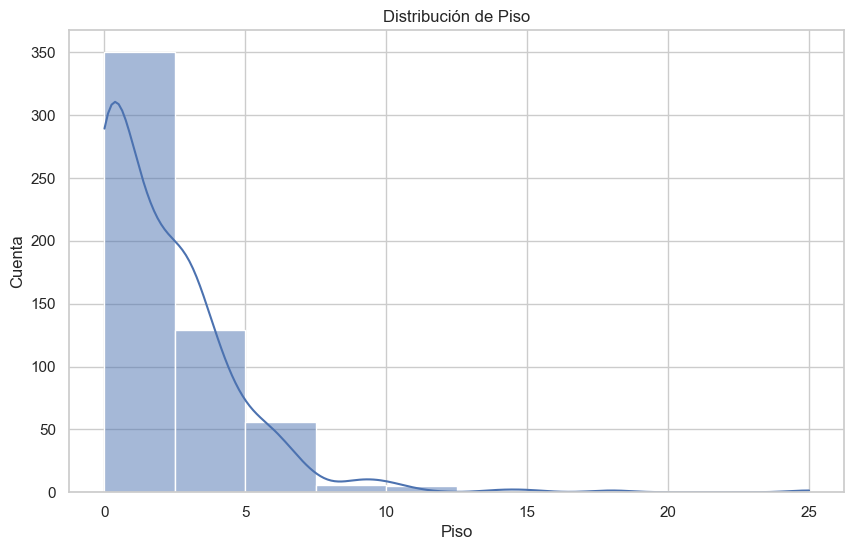

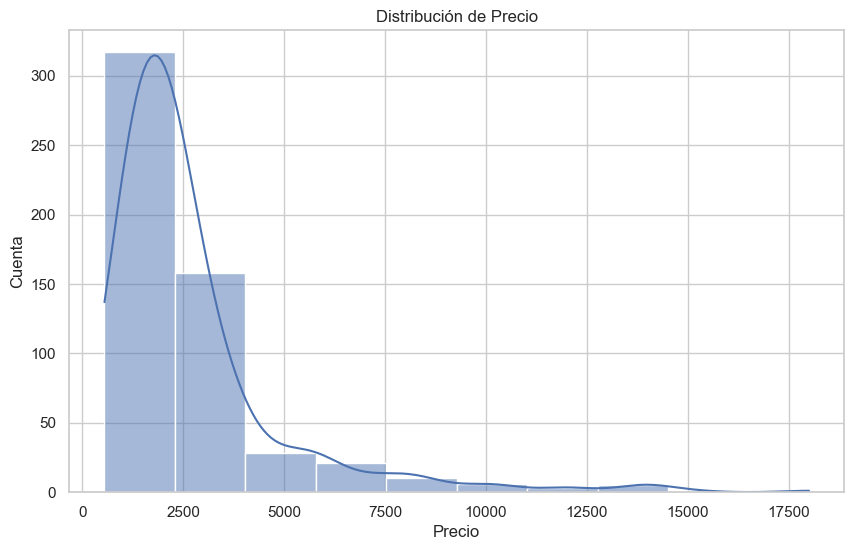

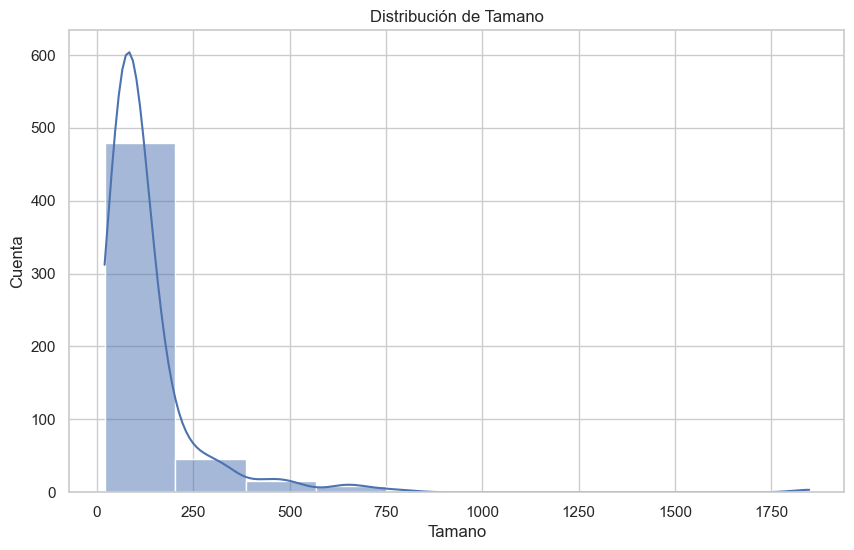

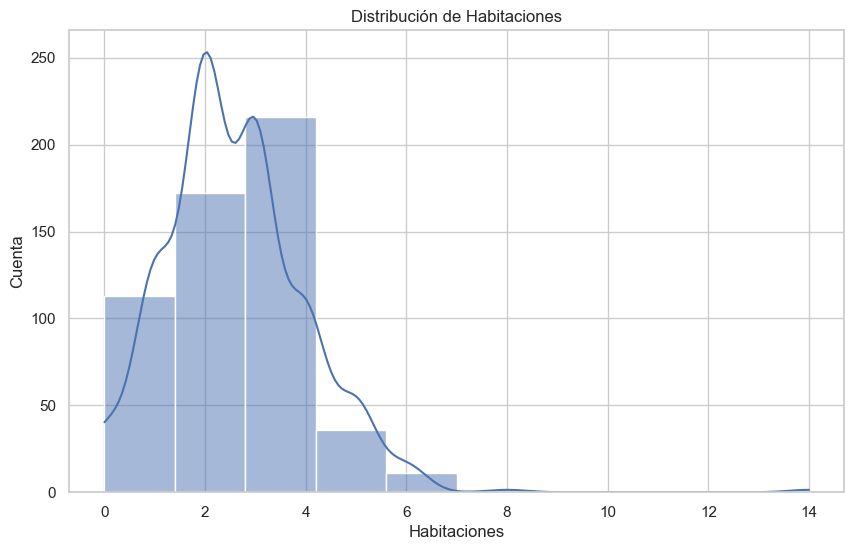

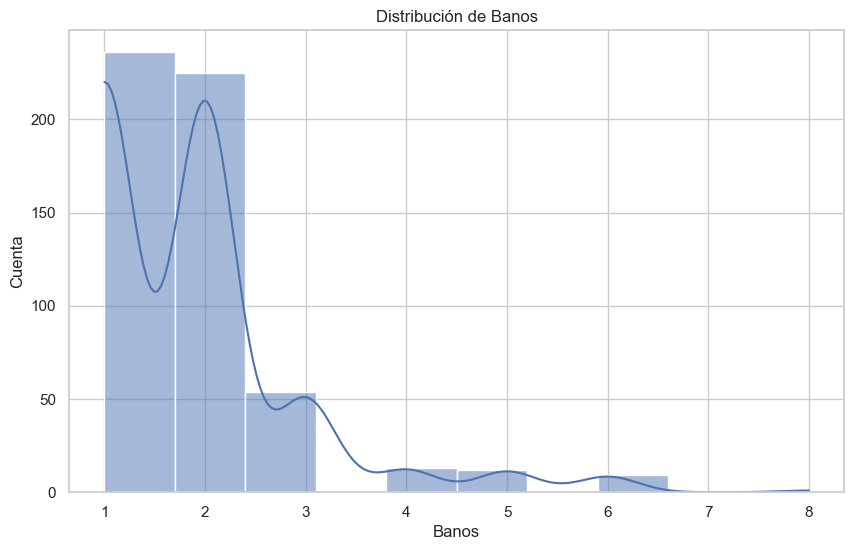

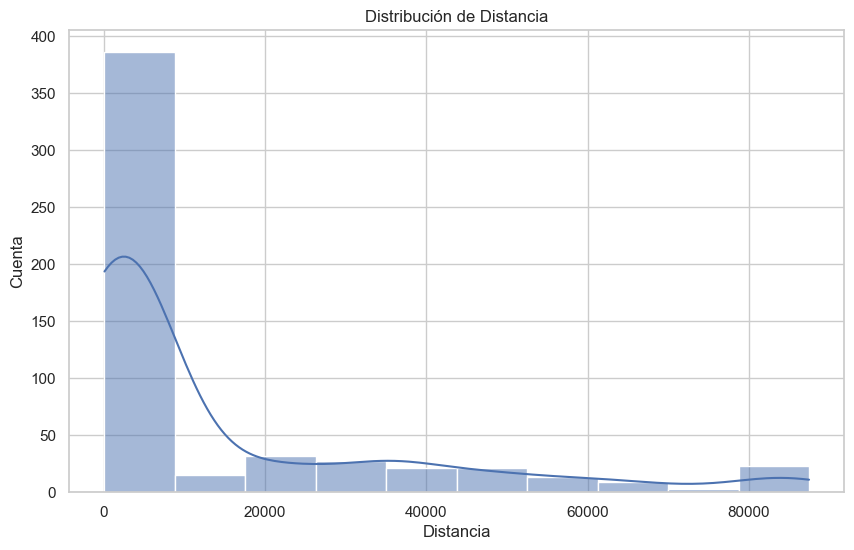

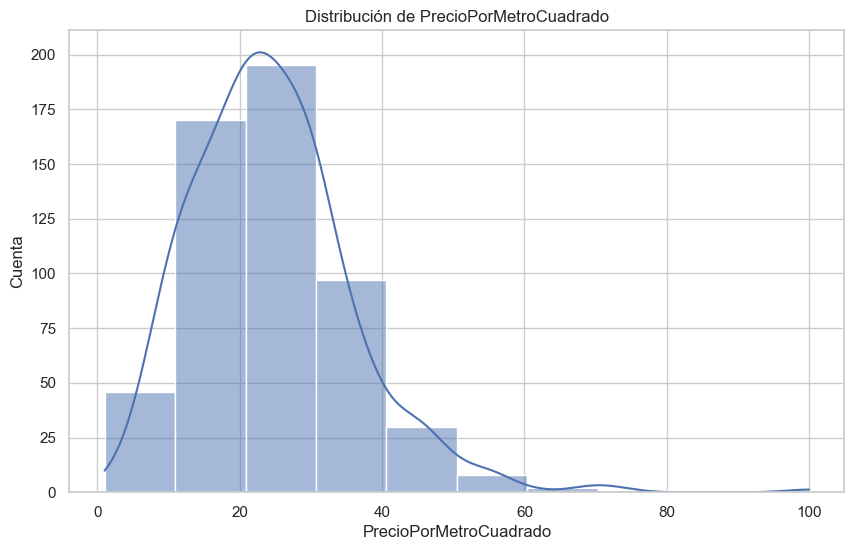

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que features_continuas ya está definida
features_continuas = ['NumeroFotos', 'Piso', 'Precio', 'Tamano', 'Habitaciones', 'Banos', 'Distancia', 'PrecioPorMetroCuadrado']

# Generar histogramas para cada característica continua
for col in features_continuas:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_transformed[col], bins=10, kde=True)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Cuenta')
    plt.show()


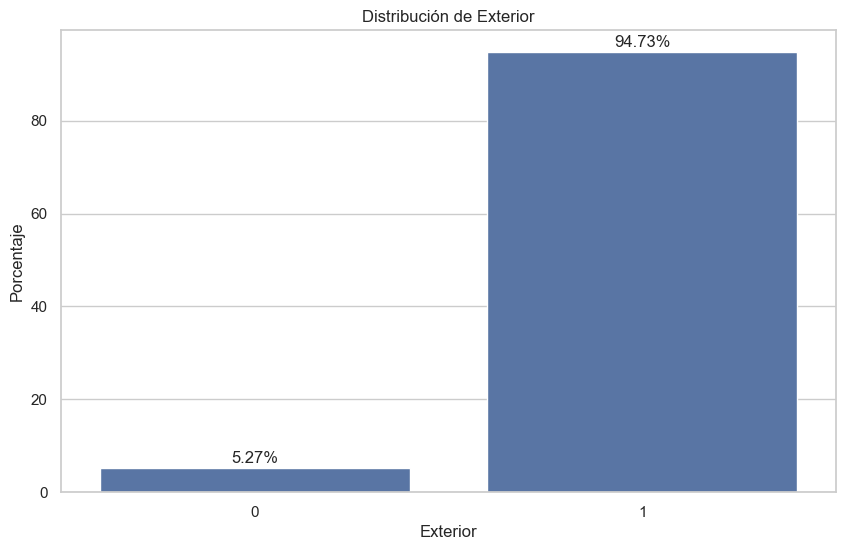

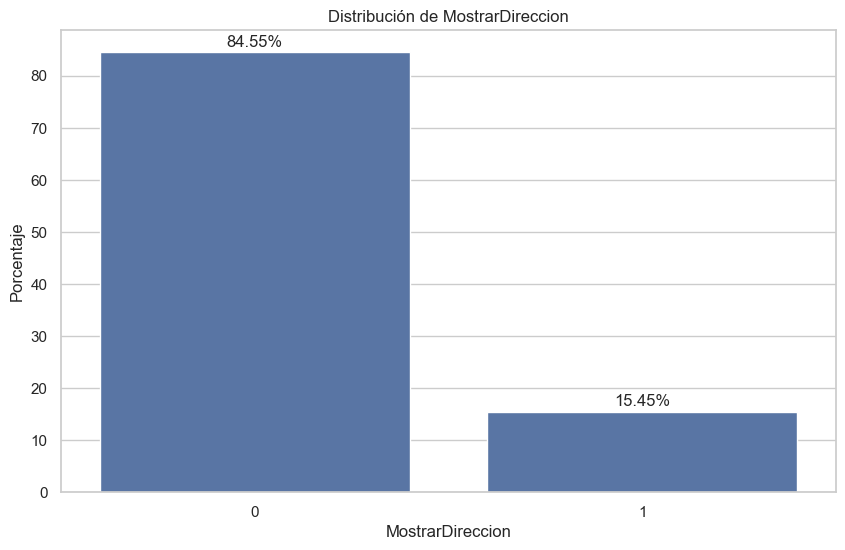

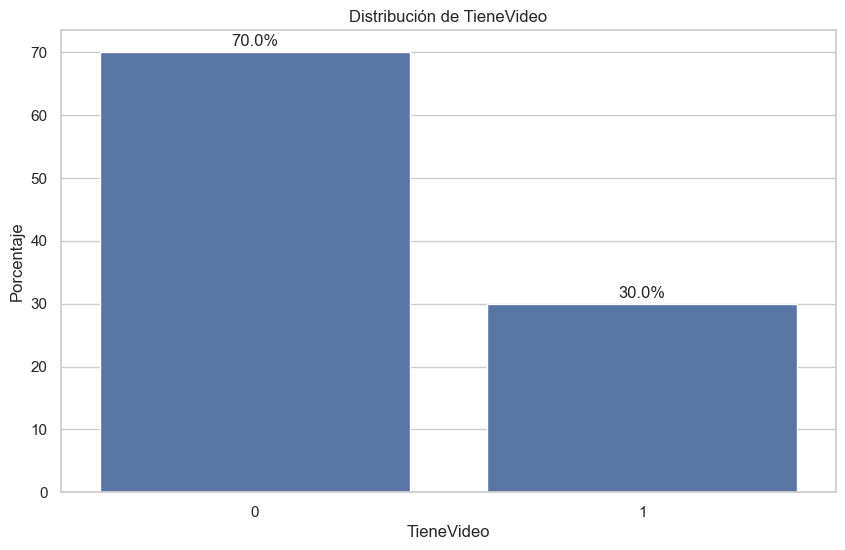

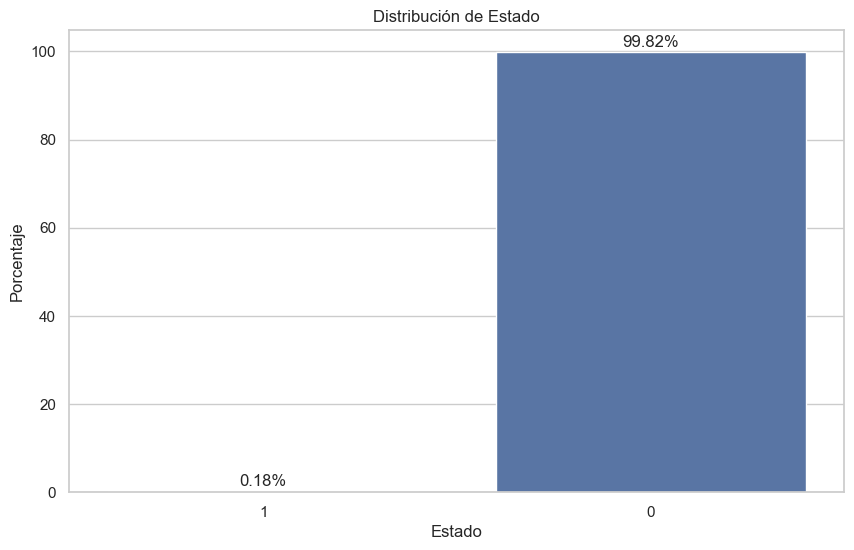

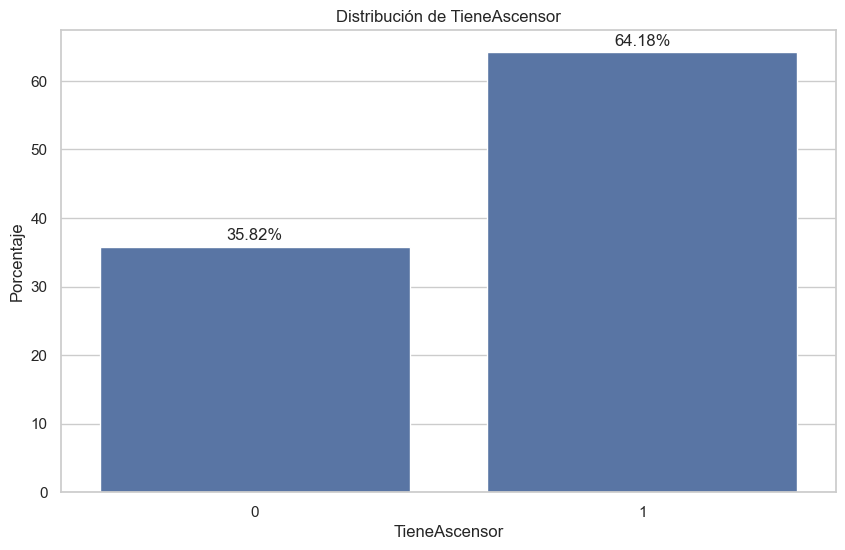

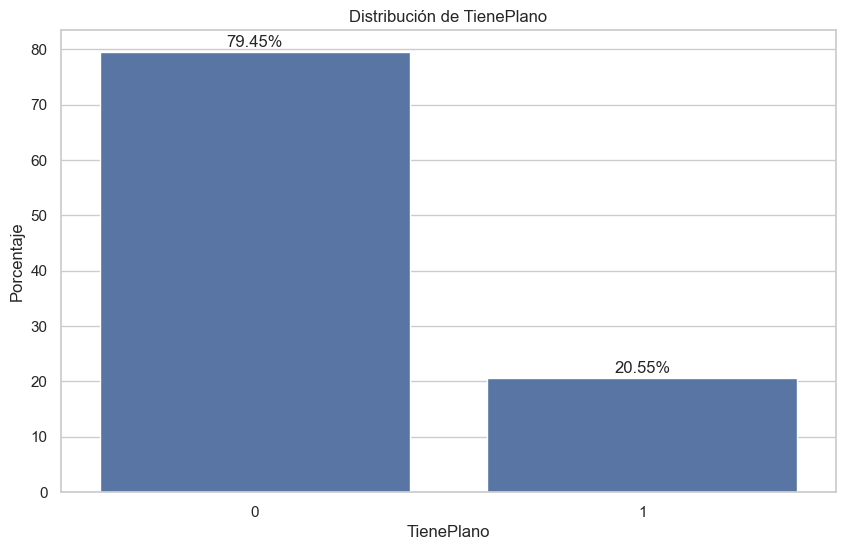

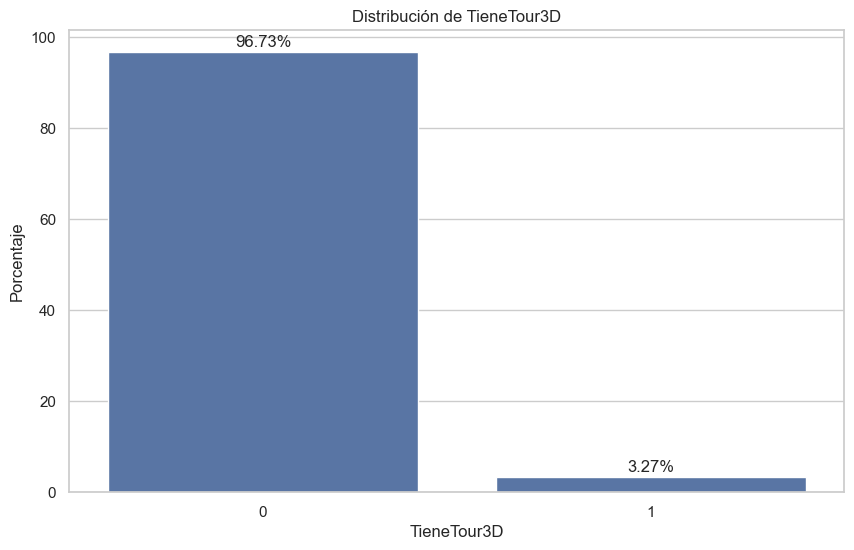

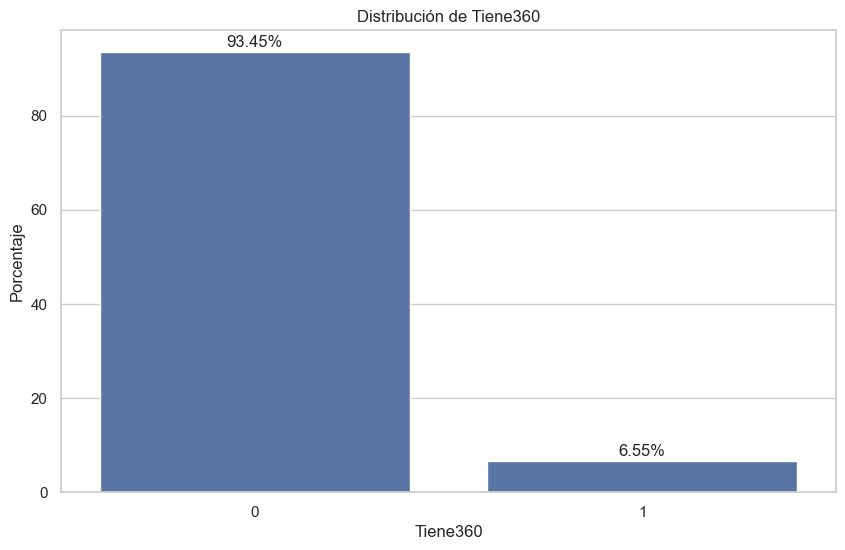

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que features_discretas ya está definida
features_discretas = ['Exterior', 'MostrarDireccion', 'TieneVideo', 'Estado', 'TieneAscensor', 'TienePlano', 'TieneTour3D', 'Tiene360']

# Generar histogramas para cada característica discreta
for col in features_discretas:
    # Contar las frecuencias relativas
    counts = df_transformed[col].value_counts(normalize=True)
    # Crear etiquetas con porcentajes
    labels = [f'{round(counts[c] * 100, 2)}%' for c in counts.index]

    # Crear la figura y el gráfico de barras
    plt.figure(figsize=(10, 6))
    sns.barplot(x=counts.index.astype(str), y=counts.values * 100)
    
    # Añadir los porcentajes como etiquetas
    for i, v in enumerate(counts.values * 100):
        plt.text(i, v + 0.5, labels[i], ha='center', va='bottom')

    # Invertir las etiquetas para algunas columnas específicas
    if col in ['TieneAscensor', 'Exterior', 'Estado']:
        plt.gca().invert_xaxis()

    # Configurar título y etiquetas
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Porcentaje')
    
    # Mostrar el gráfico
    plt.show()


In [51]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   550 non-null    int64  
 1   CodigoPropiedad         550 non-null    int64  
 2   NumeroFotos             550 non-null    int64  
 3   Precio                  550 non-null    float64
 4   TipoPropiedad           550 non-null    int32  
 5   Tamano                  550 non-null    float64
 6   Habitaciones            550 non-null    int64  
 7   Banos                   550 non-null    int64  
 8   Provincia               550 non-null    int32  
 9   Municipio               550 non-null    int32  
 10  Distrito                550 non-null    int32  
 11  MostrarDireccion        550 non-null    int32  
 12  Distancia               550 non-null    int64  
 13  TieneVideo              550 non-null    int32  
 14  Estado                  550 non-null    in

Correlaciones significativas:
                Variable 1     Variable 2  Correlation
7                    Banos         Precio     0.746649
10                   Banos   Habitaciones     0.730324
11               Distancia      Provincia     0.691939
12               Distancia      Municipio     0.687206
9                    Banos         Tamano     0.684547
5             Habitaciones         Tamano     0.622148
1                   Tamano         Precio     0.581176
3             Habitaciones         Precio     0.554690
6                    Banos    NumeroFotos     0.536548
0                   Precio    NumeroFotos     0.505609
13  PrecioPorMetroCuadrado      Distancia    -0.528674
2                   Tamano  TipoPropiedad    -0.553892
4             Habitaciones  TipoPropiedad    -0.606447
8                    Banos  TipoPropiedad    -0.621359


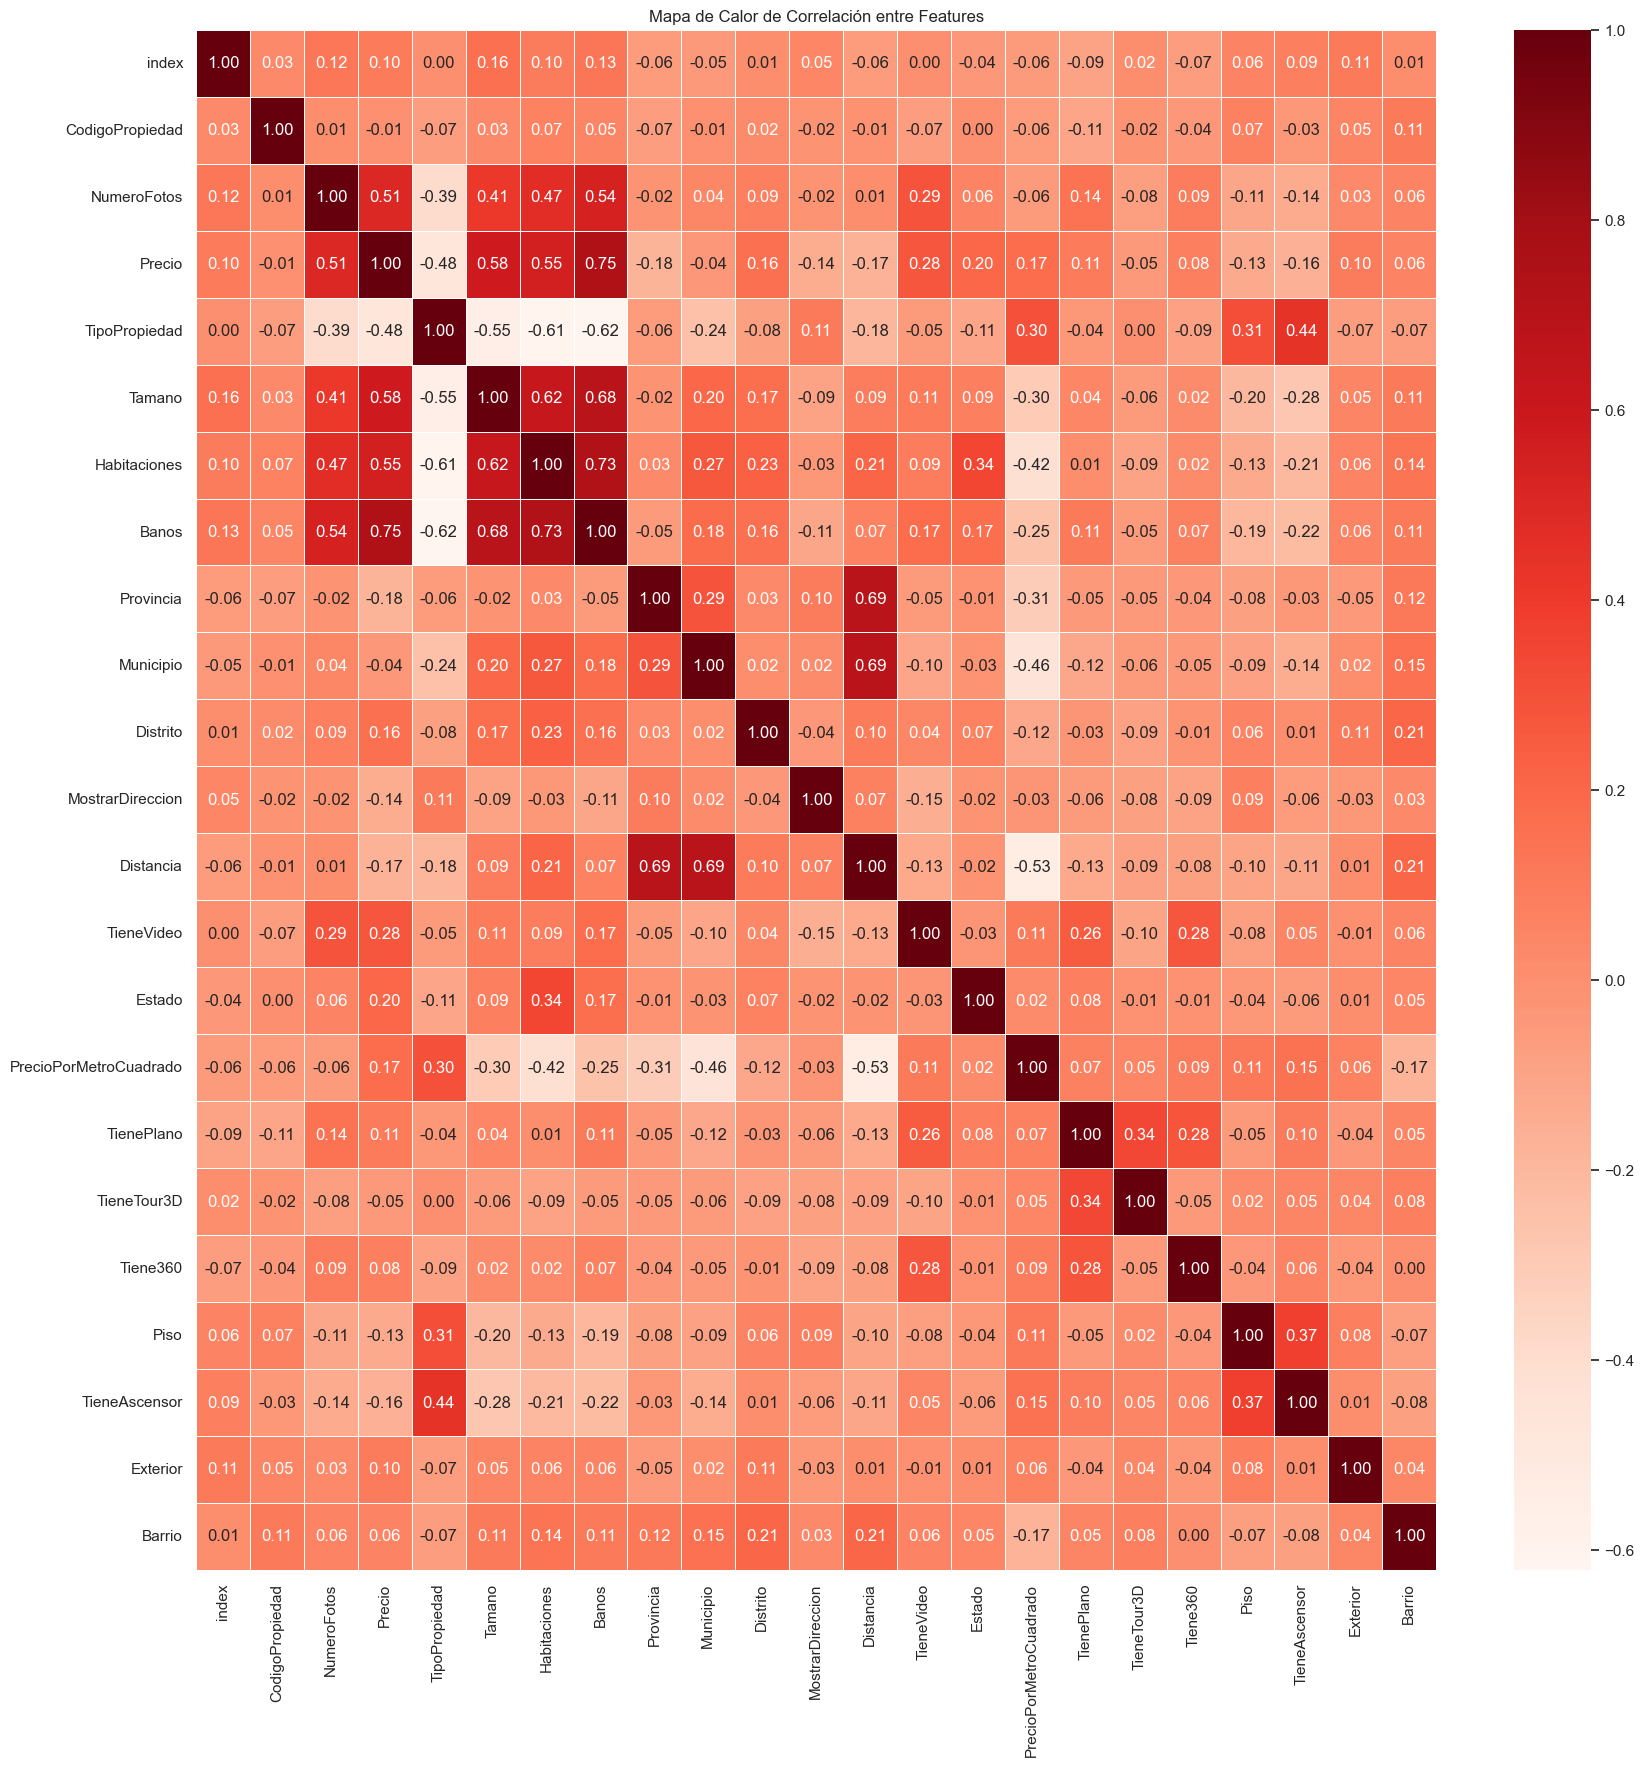

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la matriz de correlación
cor = df_transformed.corr()

# Crear una lista para almacenar las correlaciones significativas
correlation_list = []

# Umbral de correlación
threshold = 0.5

# Iterar sobre la matriz de correlación para encontrar correlaciones significativas
for i in range(len(cor.columns)):
    for j in range(i):
        if abs(cor.iloc[i, j]) > threshold:
            correlation_list.append({
                'Variable 1': cor.columns[i],
                'Variable 2': cor.columns[j],
                'Correlation': cor.iloc[i, j]
            })

# Convertir la lista en un DataFrame
significant_correlations = pd.DataFrame(correlation_list)

# Mostrar las correlaciones significativas
print("Correlaciones significativas:")
print(significant_correlations.sort_values(by='Correlation', ascending=False))

# Configurar el tamaño de la figura
plt.figure(figsize=(20, 20))

# Calcular la matriz de correlación
cor = df_transformed.corr()

# Crear el mapa de calor
sns.heatmap(cor, annot=True, cmap='Reds', fmt=".2f", linewidths=0.5)

# Mostrar el gráfico
plt.title('Mapa de Calor de Correlación entre Features')
plt.show()

# Opcional: Guardar las correlaciones significativas en un archivo CSV
# significant_correlations.to_csv('significant_correlations.csv', index=False)
